<a href="https://colab.research.google.com/github/Nwanne97/Hotel_Cancellations/blob/main/Electric_Motorcycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving electric_bike_ratings_2212 (1).csv to electric_bike_ratings_2212 (1).csv


# Background
EMO is a manufacturer of electric motorcycles.
EMO launched its first electric motorcycle in India in 2019.
The product team has been asking website users to rate the motorcycles.
Ratings from owners help the product team to improve the quality of the motorcycles.
Ratings from non-owners help the product team add new features. They hope the new
features will increase the number of new customers.
The product team wants to extend the survey. But, they want to be sure they can predict
whether the ratings came from owners or non-owners.


## Data
The dataset contains rating information about mopeds collected by the product team.

# Tasks


1. For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column
c. Describe what you did to make values match the description if they did not
match.
2. Create a visualization that shows how many reviews were from owners and how many
were not owners. Use the visualization to:
a. State which category of the variable owned has the most number of
observations
b. Explain whether the observations are balanced across categories of the
variable owned
3. Describe the distribution of the overall rating across the possible values. Your answer
must include a visualization that shows the distribution.
4. Describe the relationship between ownership and overall rating. Your answer must
include a visualization to demonstrate the relationship.
5. The business wants to predict whether a review came from an owner or not using the
data provided. State the type of machine learning problem that this is
(regression/classification/clustering).
6. Fit a baseline model to predict whether a review came from an owner or not using the
data provided. You must include your code.
7. Fit a comparison model to predict whether a review came from an owner or not using
the data provided. You must include your code.
8. Explain why you chose the two models used in parts 6 and 7.
9. Compare the performance of the two models used in parts 6 and 7, using any method
suitable for the type of model. You must include your code.
10. Explain which model performs better and why.

## Task 1 
### Data Validation
### Cross checking all variables in the dataset with the required criteria

In [ ]:
# importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

df = pd.read_csv('electric_bike_ratings_2212 (1).csv')

# Removing the day from 'review_month' column
df['review_month'] = df['review_month'].str.replace('\d+', '')
df['review_month'] = df['review_month'].str.replace('-', '')

# Removing the '/10' from the value_for_money column
df['value_for_money'] = df['value_for_money'].str.replace('/10', '')

df.info()
df.isna().sum()
print((df['reviewer_age'] == '-').sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
105


<ipython-input-2-2bf31ad73e8f>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_month'] = df['review_month'].str.replace('\d+', '')


In [ ]:
# Filling the null colums
df['web_browser'] = df['web_browser'].fillna('unknown')
df.isna().sum()
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29


In [ ]:
# Checking further for unique missing values

df['reviewer_age'].unique()

# Replacing '-' values with zero to enable mean calculation

df['reviewer_age'] = df['reviewer_age'].replace('-', 0)

#Finding the mean and confirming the unique values

reviewer_age_mean = df['reviewer_age'].astype('int').mean()
df['reviewer_age'] = df['reviewer_age'].replace(0, reviewer_age_mean)
df['reviewer_age'].unique()

df['reviewer_age'] = df['reviewer_age'].astype('float')
df['value_for_money'] = df['value_for_money'].astype('float')

## **Data Validation**

The dataset contains 1500 rows and 8 columns with a few missing values. I have validated all the columns against the criteria in the dataset table:

**owned**: Same as description without missing values, two categories.

**make_model**: Same as description without missing values

**review_month**: almost similar to description, but with a few columns having the day attached. So, I removed the day, leaving just the month.

**web_browser**: Same as description, but with 150 missing values. So I replaced with 'unknown'

**reviewer_age**: Same as description, but with 105 missing values indicated as '-'. So, I replaced the missing values with the mean of the column

**primary_use**: Same as description, without missing values.

**value_for_money**: Same as description, but including the highest rating as the denominator. So, I removed the '/10'.

**overall_rating**: Same as description

## Task 2
## **Visualizing Reviews by Ownership**

'0' represents people who do not own the bikes, while '1' represents bike owners.

In the 'owned' category, the bike owners (where 'owned' == 1), has the most number of observations. This shows that people who own the bikes have put out more reviews in this dataset. 

The observations are relatively balanced across the category of the variable, 'owned'. The ratio (percentage) of owners to non-owners is 59:41.

Also, from investigating different options: web browser, primary use and make model, we can see that Chrome users dropped the most reviews, owners of model Nielah-Eyden also dropped reviews more than any other model. 

People whose primary use was commuting also dropped more reviews than leisure users.

1    0.593333
0    0.406667
Name: owned, dtype: float64

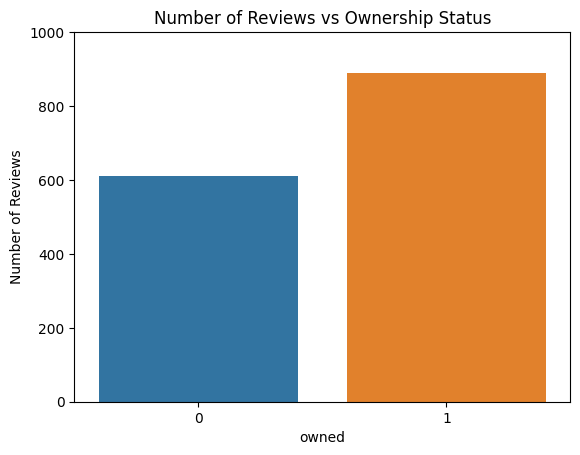

In [ ]:
df['owned'] = df['owned'].astype('category')
sns.countplot(x='owned', data=df, order=[0, 1])
plt.ylim(0, 1000)
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs Ownership Status')
df.owned.value_counts(normalize=True)

Text(0, 0.5, 'Number of Reviews')

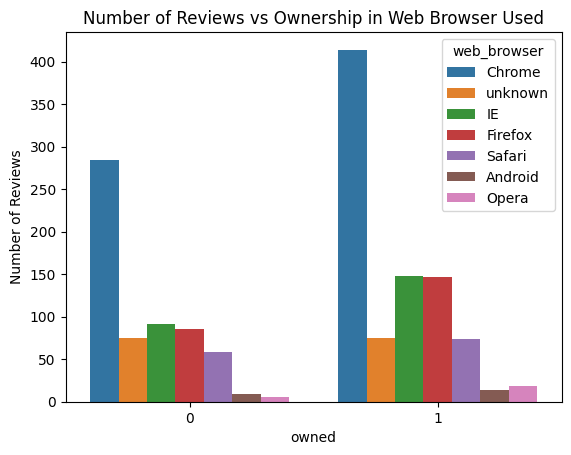

In [ ]:
sns.countplot(x='owned', data=df, order=[0, 1], hue ='web_browser')
plt.title('Number of Reviews vs Ownership in Web Browser Used')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

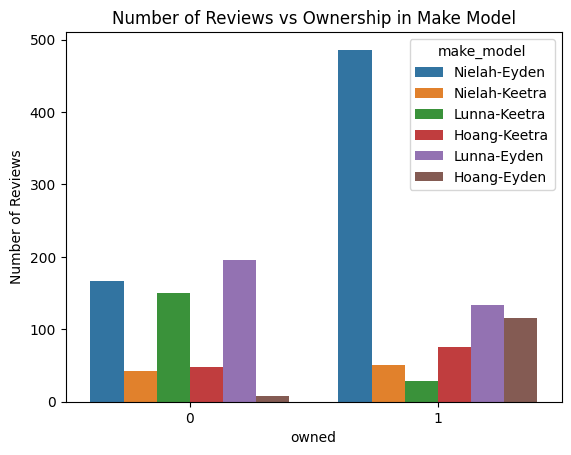

In [ ]:
sns.countplot(x='owned', data=df, order=[0, 1], hue ='make_model')
plt.title('Number of Reviews vs Ownership in Make Model')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

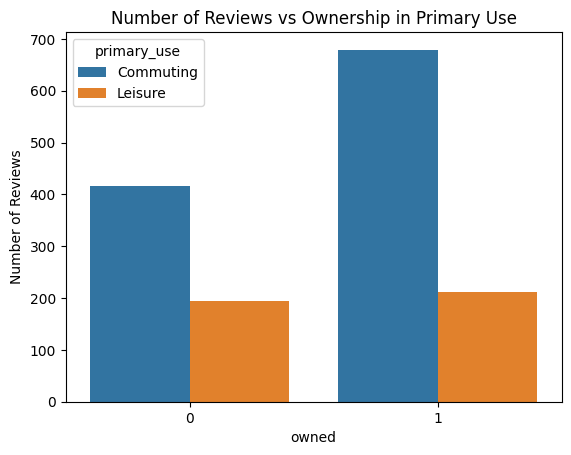

In [ ]:
sns.countplot(x='owned', data=df, order=[0, 1], hue ='primary_use')
plt.title('Number of Reviews vs Ownership in Primary Use')
plt.ylabel('Number of Reviews')

## Task 3
## Distribution of Overall Rating

The distribution of rating shows that the minimum and maximum overall ratings are 11.69 and 22.76 respectively, while it has a median of 18.24 which is also its upper quartile. Majority of the ratings are between 15.32 and 18.84. The median is also closer to the upper quartile, showing that the mean ratings over 18.24 are higher than those less than 18.24.

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

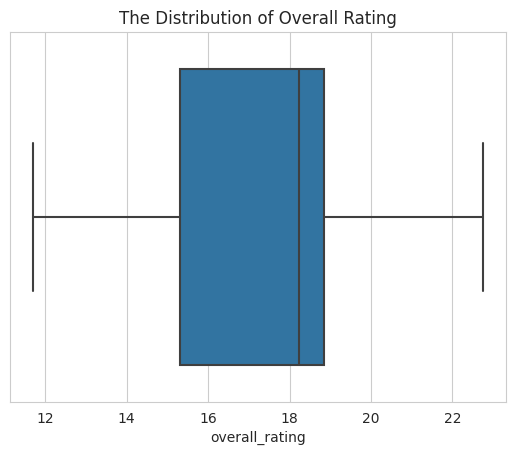

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='overall_rating', data=df)
plt.title('The Distribution of Overall Rating')
df['overall_rating'].describe()

## Task 4
## Relationship between Ownership and Overall Rating

The boxplot below shows that, on an average, owners are much more likely to give a higher overall rating than non-owners. The median overall rating for the owners is about the same level as the upper quartile for non-owners. 

The interquartile range (IQR) of overall rating for non-owners falls between 14.5 and 18.5, while owners' IQR fell between 17  and 19. Asides from a few outliers, owners overall rating had a lesser spread, with most of them being higher ratings compared to non-owners.


<Axes: xlabel='owned', ylabel='overall_rating'>

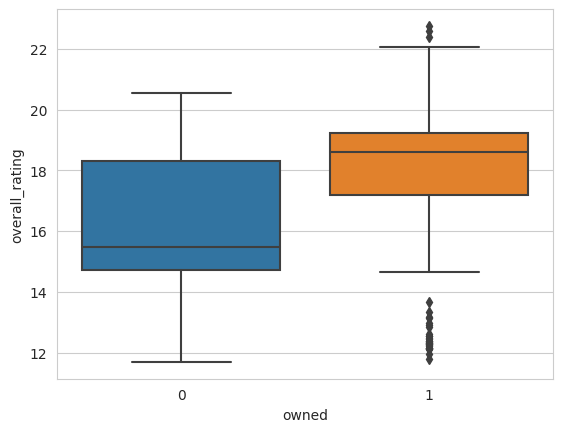

In [ ]:
sns.boxplot(x='owned', y='overall_rating', data=df)

## Task 5
## **Identifying the Machine Learning Problem**

Predicting whether a review came from an owner or not is a classification problem. It is a binary classification problem because there are only two distinct outcomes: owned or not, represented as 1 and 0 respectively. 

## Task 6
## Fitting the Baseline Model (Logistic Regression)

In [ ]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

# Changing values to numeric values
df['reviewer_age'] = df['reviewer_age'].astype('float')
df['value_for_money'] = df['value_for_money'].astype('float')

# Encoding Dummy variables
features = df.drop('owned', axis = 1)
df_dummies= pd.get_dummies(features)

X = df_dummies.values
y = df['owned'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Fitting the Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Task 8
## Models Used for Evaluation

I used the Logistic Regression model as the basline model because it is a simple and efficient method that is ideal for binary classifications. I chose the Decision Tree Model as a comparison model because it is very efficient to train and interpret, and is ideal for numerical and categorical data. 



## Task 9
## Estimating Model Performance

The performance of the model is going to be evaluated using accuracy. Accuracy is one of the most ideal model performance evaluators for a classification especially because it measures how often the classifier predicts results correctly. 

Also, the target class is well balanced to reduce the risk of bias. This makes accuracy an ideal predictor.


## Logistic Regression Model Evaluation:


In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.72      0.59      0.64       116
           1       0.77      0.85      0.81       184

    accuracy                           0.75       300
   macro avg       0.74      0.72      0.73       300
weighted avg       0.75      0.75      0.74       300




## Decision Tree Model Evaluation:


In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       116
           1       0.73      0.76      0.74       184

    accuracy                           0.68       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.68      0.68      0.68       300



## Task 10
## Explaining Model Performance

The accuracy of the Logistic Regression Model, 0.74, is higher than that of the Decision Tree Model, 0.67, which shows that the Logistic Regression Model which is the baseline model used, performs better than the Desicion Tree and it predicts more correctly whether a review came from an owner or not. 

Accuracy represents the number of correctly classified data instances over the total number of data instances, and The Logistic Regression Model gives a better performance.